# Plot sea level budgets 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')


In [4]:
tg_sel = 'ZSM' # Tide gauge selection

In [53]:
b1 = '../outputs/slbudget_2022_11_04_ZSM_altimetry_1993_2020_ERA5_StericIAP_2000m.csv'
b2 = '../outputs/slbudget_2022_06_14_ZSM_1950_2020_ERA5_StericIAP_2000m.csv'
b3 = '../outputs/slbudget_2022_11_04_ZSM_tide_gauge_1950_2021_ERA5_StericIAP_1000m.csv'

budget_df = pd.read_csv(b3)
budget_df.set_index('time', inplace=True)



In [54]:
budget_df

,Total,LocSteric,GloSteric,GIA,Glaciers,Antarctica,Greenland,TWS,Nodal,Wind,Pressure,Obs
time,,,,,,,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.580712
1951,-5.058634,-3.154764,0.097124,0.036833,0.054167,0.004167,0.006667,0.360000,0.007106,-2.846104,0.376170,1.047379
1952,0.170836,0.961062,0.176444,0.073667,0.115833,0.010000,0.011667,0.333333,-0.046784,-1.360111,-0.104274,3.480712
1953,-5.008433,-2.191099,0.177486,0.110500,0.186667,0.014167,0.017500,0.296667,-0.155587,-1.842369,-1.622364,-0.419288
1954,0.949203,-2.999954,0.193522,0.147333,0.242500,0.019167,0.020000,0.148333,-0.307016,3.325759,0.159559,2.347379
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,11.107861,0.837110,4.838131,2.467833,2.657500,0.850833,0.269167,-0.684167,-1.030123,1.595332,-0.693756,18.114046
2018,4.801805,0.082601,4.889651,2.504667,2.677500,0.959167,0.276667,-0.811667,-0.928142,-4.222679,-0.625959,10.830712
2019,9.601763,0.424601,5.082026,2.541500,2.725333,0.990444,0.286778,-0.516500,-0.781557,-0.989294,-0.161569,17.814046


In [55]:
def plot_budget(tg_sel, slmean_df):
    '''Summary plot of the sea level budget. Should be split in smaller functions.'''
    
    # Add 3 years rolling mean
    slmean_df = slmean_df.rolling(3, center=True).mean()
    
    ### Plot compaison between tide gauge observations and budget
    fig, ax = plt.subplots(1, 2, figsize=(9,4))

    ax[0].plot(slmean_df.Obs - slmean_df.Obs.mean(), '-', label='Tide gauge observations')
    ax[0].plot(slmean_df.Total - slmean_df.Total.mean() , '-', label='Sum of contributors')

    ax[0].set_ylabel('sea level (cm)')
    ax[0].set_title('Yearly average sea level at '+tg_sel)
    ax[0].grid(True)
    ax[0].legend(loc='upper left')

    ### Plot the difference between observations and budget
    diff_df = slmean_df.Obs - slmean_df.Total
    diff_df = diff_df - diff_df.mean()

    t = ('Normalised RMSE (cm): '+
         str( round(np.sqrt( (diff_df**2).sum() ) / len(diff_df), 2 ))+ '\n' +
         'Normalised AE (cm): '+
         str( round( np.abs(diff_df).sum() / len(diff_df),2)))
    ax[1].text(0.98, 0.98, t, ha='right', va='top', transform=ax[1].transAxes)
    ax[1].set_title('Difference observations - budget')
    ax[1].grid(True)
    ax[1].plot(diff_df)
    
    return fig, ax

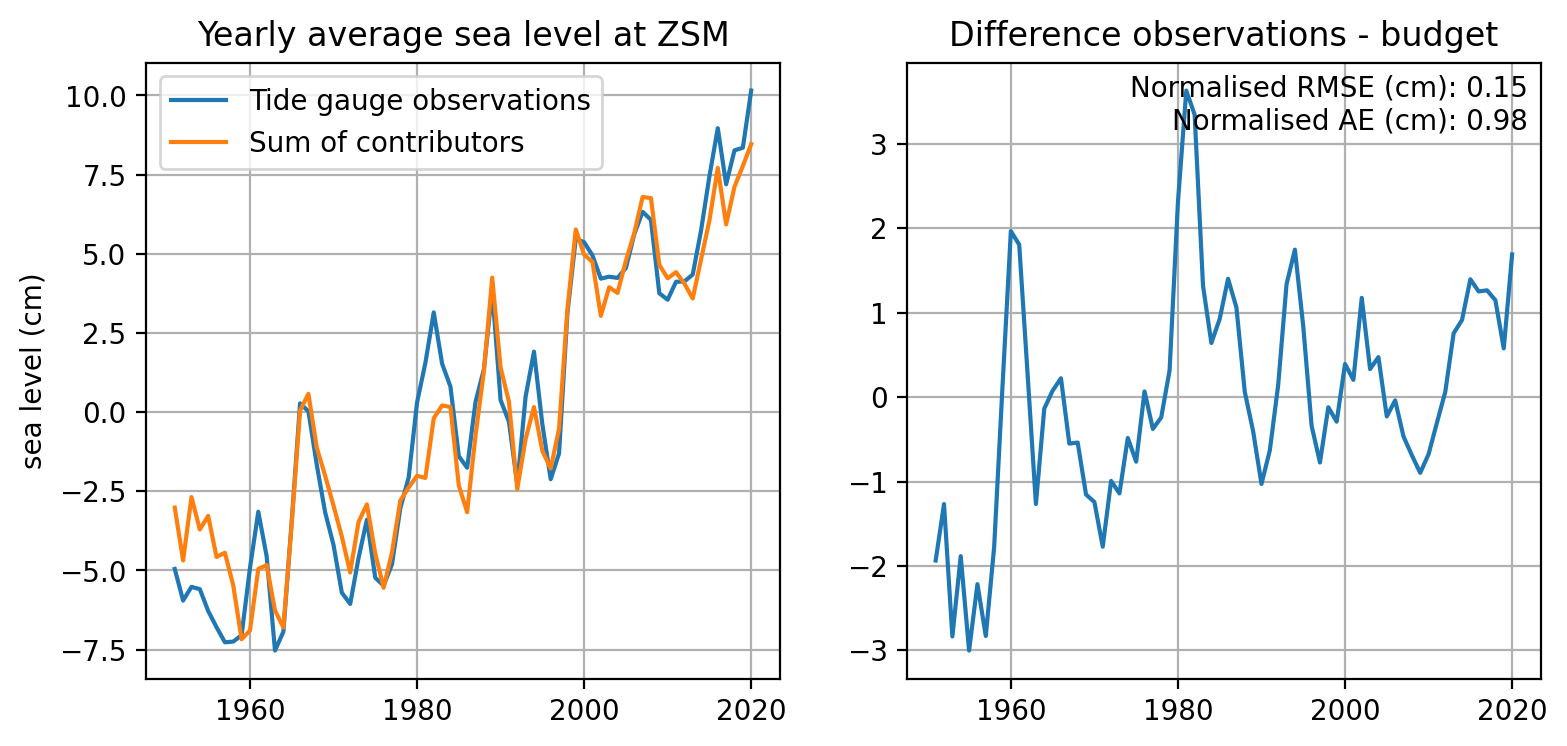

In [56]:
fig, ax = plot_budget(tg_sel, budget_df)

In [57]:
def plot_trend_budget(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    if 'Steric' in slmean_df.columns:
        colors = ['red', 'blue', 'green', 'brown', 'magenta', 'grey', 'orange', 
                  'black', 'cyan', 'yellow']
            
    else:  
        colors = ['red', 'blue', 'purple', 'green', 'brown', 'magenta', 'grey', 
                  'orange', 'black', 'cyan', 'olive']

    ind = np.arange(len(slmean_df.columns) - 1 )

    legend_elements = []
    for i in ind:
        legend_elements.append(Line2D([0], [0], color = colors[i], lw = 4, 
                                      label = slmean_df.columns[i]))

    legend_elements.append(Line2D([0], [0], color = 'black', lw = 2, 
                                  label = 'tg obs'))
    
    ax.set_title(f'Linear trend budget: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(ind, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.set_ylabel('Linear trend (mm/year)')
    ax.legend(handles=legend_elements, loc='upper right', prop={'size': 9})
    ax.set_ylim(-0.6, 3.4)
    ax.text(0.02, 0.01, 
                 f'Observed trend: {round(lin_trend[-1],2)}\n'+ 
                 f'Budget trend: {round(lin_trend[0],2)}', 
                 va='bottom', ha='left', 
                 transform=ax.transAxes)
    
    return fig, ax

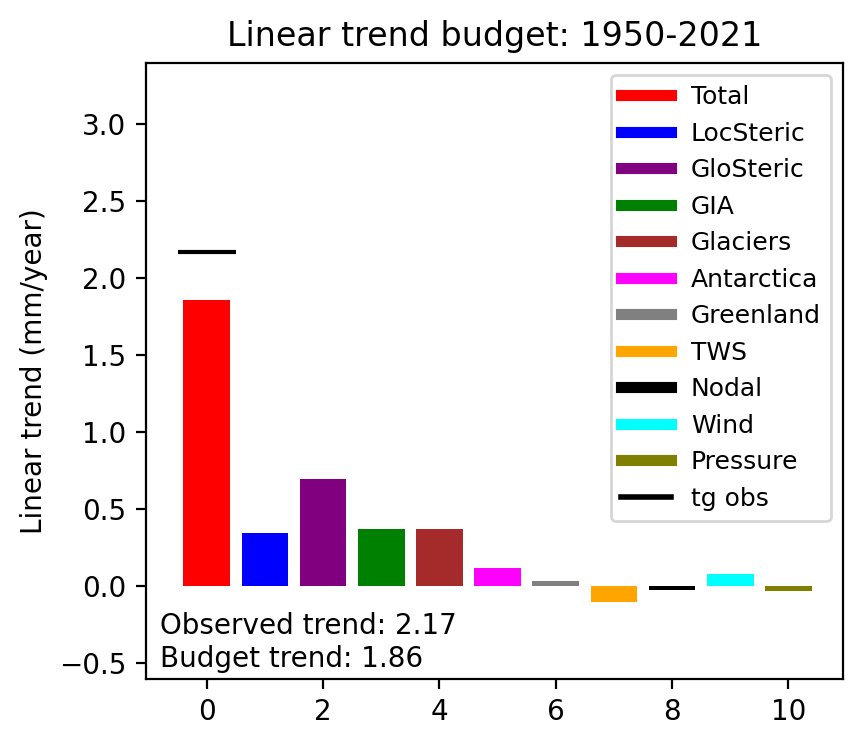

In [58]:
fig, ax = plot_trend_budget(budget_df)

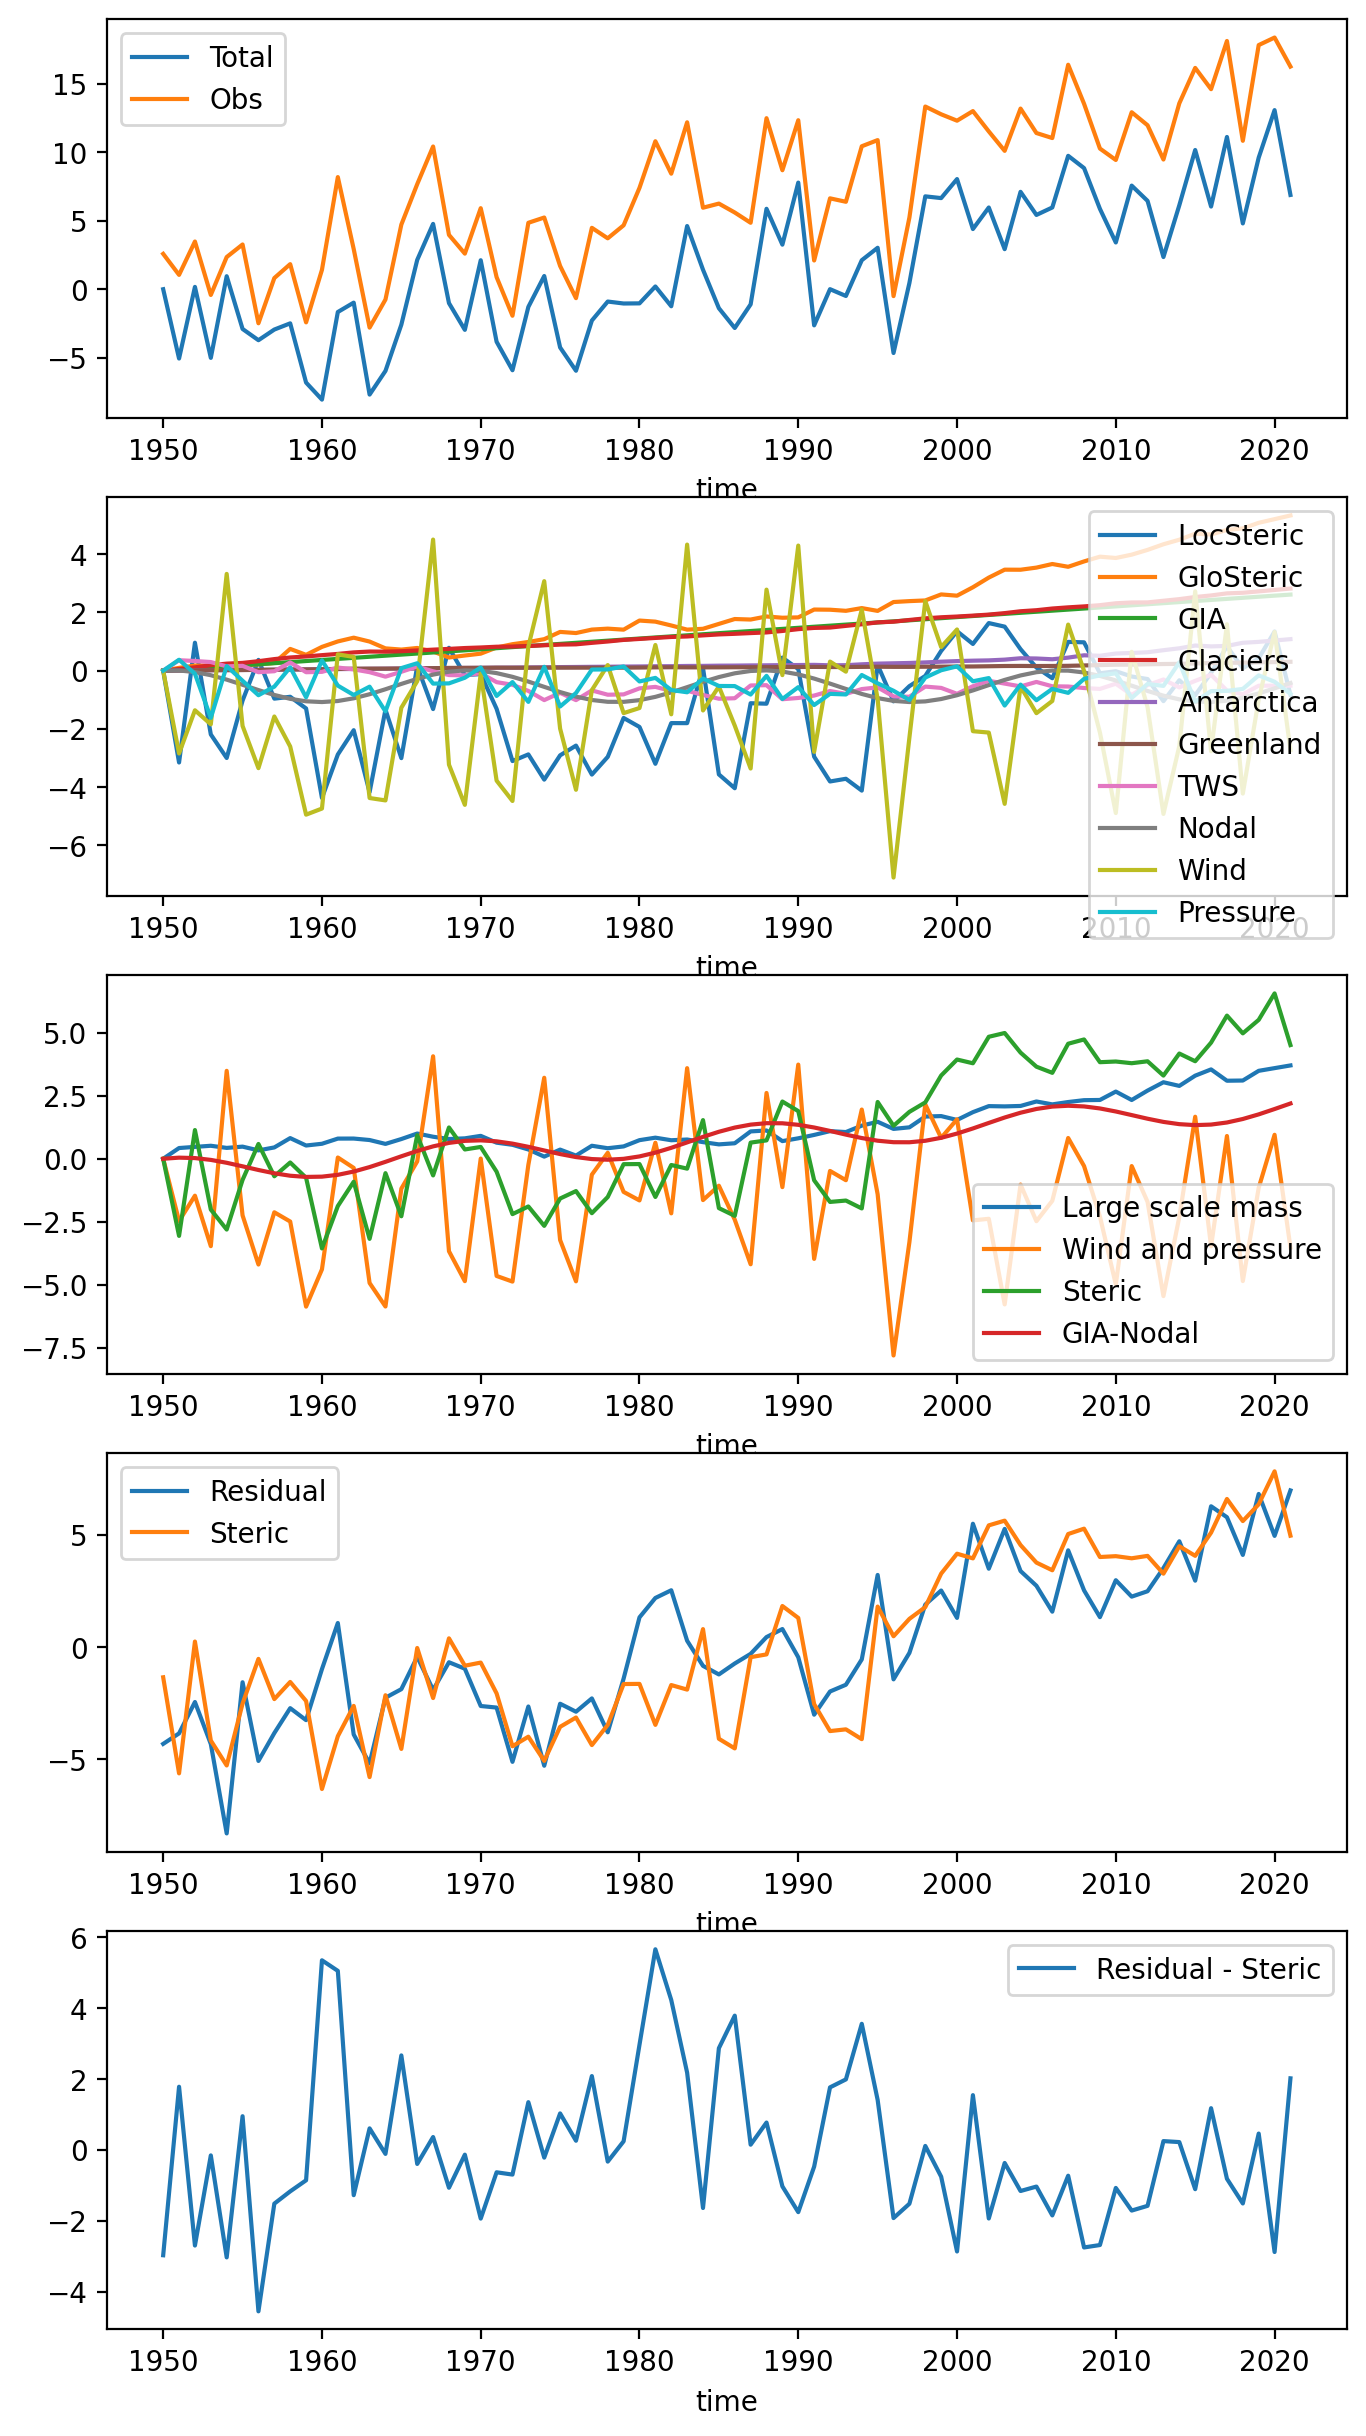

In [85]:
fig, ax = plt.subplots(5, figsize=(8,15))
budget_df[['Total', 'Obs']].plot(ax=ax[0])
budget_df[['LocSteric', 'GloSteric', 'GIA', 'Glaciers', 'Antarctica', 
           'Greenland', 'TWS', 'Nodal', 'Wind', 'Pressure']].plot(ax=ax[1])

mass = budget_df[['Glaciers', 'Antarctica', 'Greenland', 'TWS']].sum(axis=1)
wind_pressure = budget_df[['Wind', 'Pressure']].sum(axis=1)
steric = budget_df[['LocSteric', 'GloSteric']].sum(axis=1)
gia_nodal = budget_df[['GIA', 'Nodal']].sum(axis=1)

mass.plot(ax=ax[2], label='Large scale mass')
wind_pressure.plot(ax=ax[2], label='Wind and pressure')
steric.plot(ax=ax[2], label='Steric')
gia_nodal.plot(ax=ax[2], label='GIA-Nodal')

ax[2].legend()

res = budget_df['Obs']-mass-wind_pressure-gia_nodal
res = res-res.mean(axis=0)
steric = 1.4*(steric-steric.mean(axis=0))

res.plot(ax=ax[3], label='Residual')
steric.plot(ax=ax[3], label='Steric')

ax[3].legend()

(res-steric).plot(ax=ax[4], label='Residual - Steric')

ax[4].legend()

#plt.tight_layout()

In [87]:
((res-steric)**2).mean(axis=0)

4.348551675889693

In [86]:
((res-1.4*steric)**2).mean(axis=0)

9.512337813000588

In [19]:
budget_df

,Total,LocSteric,GloSteric,GIA,Glaciers,Antarctica,Greenland,TWS,Nodal,Wind,Pressure,Obs
time,,,,,,,,,,,,
1993,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.227639
1994,0.837730,0.074749,0.093743,0.0,0.055000,0.030000,0.004167,0.165833,-0.172477,1.419900,-0.833185,-0.221667
1995,-0.317635,0.522875,-0.002695,0.0,0.120833,0.053333,0.009167,0.224167,-0.314888,-0.441854,-0.488572,1.694167
1996,-4.478584,0.799075,0.302123,0.0,0.144167,0.065000,0.005000,-0.089167,-0.411154,-4.994417,-0.299211,-6.028194
1997,0.127847,1.498331,0.333315,0.0,0.203333,0.075833,0.005000,-0.096667,-0.450404,-1.660761,0.219867,0.920417
1998,3.818834,2.203213,0.356420,0.0,0.258333,0.095000,0.010000,0.250833,-0.428208,1.723995,-0.650754,4.476667
1999,3.071357,2.633282,0.563422,0.0,0.295833,0.120000,0.011667,0.205833,-0.347071,0.625534,-1.037143,3.176944
2000,3.314974,3.195229,0.520010,0.0,0.320833,0.140000,0.016667,0.002500,-0.216154,0.541919,-1.206030,1.567639
2001,2.872561,3.325326,0.809437,0.0,0.352500,0.155000,0.018333,0.263333,-0.050240,-1.423035,-0.578093,3.884306
